In [1]:
import os
import pandas as pd
import numpy as np
import xarray as xr
from sklearn_xarray import wrap, Target
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
PathR = "D:\DOCS\PATIA\ARCHIVOS\VHI_Raw" #Lectura de archivos VHI crudos

In [3]:
RawVHI = pd.read_csv(PathR+"\\UNIFICADO.csv", index_col = 4, parse_dates = True)

In [4]:
del RawVHI["Unnamed: 0"]

# **0. Visualización de datos de VHI**

In [5]:
#RawVHI=RawVHI.loc["2006-09-01":"2006-10-01"]
RawVHI

,x,y,VALOR
Fecha,,,
2001-01-01,-76.972145,2.510791,0.431432
2001-01-01,-76.963162,2.510791,0.614355
2001-01-01,-76.954179,2.510791,0.624116
2001-01-01,-76.945196,2.510791,0.670600
2001-01-01,-76.972145,2.501808,0.503002
...,...,...,...
2021-12-01,-77.789612,0.687211,0.487293
2021-12-01,-77.879444,0.678228,0.438945
2021-12-01,-77.861477,0.678228,0.503288


# **1. Datos mensuales promedio multianual**

In [6]:
PromMesTotal = RawVHI.groupby(RawVHI.index.strftime("%m")).mean() #Promedio mensual total de todo el AOI

In [7]:
PromMesTotal

,x,y,VALOR
Fecha,,,
01,-77.207130,1.598830,0.589565
02,-77.209409,1.595667,0.563981
03,-77.209391,1.595344,0.578061
04,-77.206993,1.597148,0.579666
05,-77.207377,1.598829,0.561245
06,-77.206495,1.606515,0.558241
07,-77.208132,1.598838,0.574709
08,-77.206392,1.603263,0.586222
09,-77.210144,1.596797,0.555662


# **2. Datos mensuales promedio por año**

In [8]:
PromMeses = RawVHI.groupby(pd.Grouper(freq="M")).mean()

In [9]:
PromMeses['Meses'] = pd.DatetimeIndex(PromMeses.index).month

In [10]:
PromMeses['Anios'] = pd.DatetimeIndex(PromMeses.index).year

In [11]:
PromMeses

,x,y,VALOR,Meses,Anios
Fecha,,,,,
2001-01-31,-77.208440,1.591855,0.635868,1,2001
2001-02-28,-77.208336,1.597052,0.611741,2,2001
2001-03-31,-77.199728,1.607479,0.530273,3,2001
2001-04-30,-77.209002,1.592161,0.612589,4,2001
2001-05-31,-77.205535,1.602879,0.537826,5,2001
...,...,...,...,...,...
2021-08-31,-77.207843,1.591533,0.510306,8,2021
2021-09-30,-77.227000,1.577095,0.470451,9,2021
2021-10-31,-77.211011,1.584244,0.511375,10,2021


# **3. Datos Trimestrales promedio**

In [12]:
QMeses = RawVHI.groupby(pd.Grouper(freq="Q")).mean()

In [13]:
QMeses

,x,y,VALOR
Fecha,,,
2001-03-31,-77.205646,1.598571,0.594218
2001-06-30,-77.207892,1.599491,0.569132
2001-09-30,-77.204556,1.604222,0.630084
2001-12-31,-77.208950,1.592100,0.635757
2002-03-31,-77.198867,1.608649,0.558694
...,...,...,...
2020-12-31,-77.212235,1.594302,0.549821
2021-03-31,-77.207460,1.604723,0.571635
2021-06-30,-77.209528,1.594036,0.567516


In [14]:
QMeses['Meses'] = pd.DatetimeIndex(QMeses.index).month

# **Gráficos**

# **<font color="red">1. Promedio mensual multianual</font>**

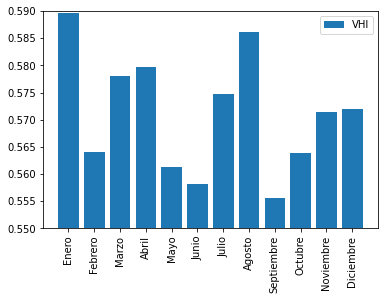

In [15]:
Meses = ["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"]
plt.bar(Meses, PromMesTotal["VALOR"], label= "VHI")
plt.xticks(rotation=90)
plt.ylim(bottom=0.55, top=0.59)
plt.legend()
plt.show()

# **<font color="red">2. Boxplot mensual multianual</font>**

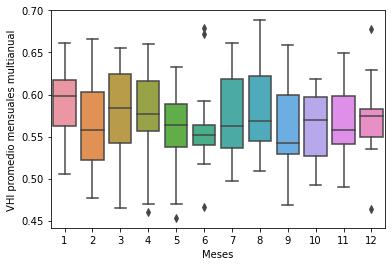

In [16]:
sns.boxplot(x='Meses', y='VALOR', data=PromMeses)
plt.ylabel("VHI promedio mensuales multianual")
plt.xlabel("Meses")
plt.show()

# **<font color="red">2. Promedio mensual</font>**

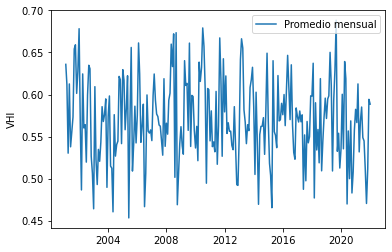

In [17]:
plt.plot(PromMeses.index, PromMeses["VALOR"], label="Promedio mensual")
plt.legend()
plt.ylabel("VHI")
plt.show()

In [18]:
PromMeses.to_csv("D:\DOCS\PATIA\PromMeses.csv")

# **<font color="red">2. Boxplot promedio anual</font>**

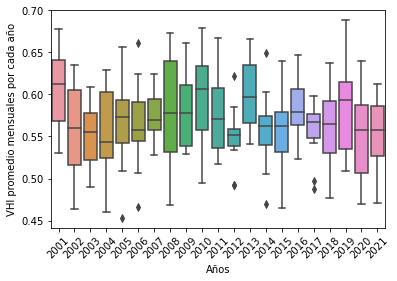

In [19]:
sns.boxplot(x='Anios', y='VALOR', data=PromMeses)
plt.ylabel("VHI promedio mensuales por cada año")
plt.xlabel("Años")
plt.xticks(rotation=45)
plt.show()

# **<font color="red">3. Trimestrales promedio</font>**

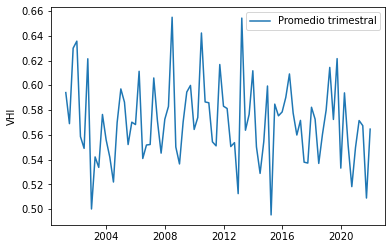

In [20]:
plt.plot(QMeses.index, QMeses["VALOR"], label="Promedio trimestral")
plt.legend()
plt.ylabel("VHI")
plt.show()

# **<font color="red">3. Boxplot trimestral promedio multianual</font>**

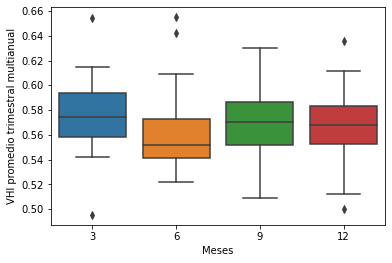

In [21]:
sns.boxplot(x='Meses', y='VALOR', data=QMeses)
plt.ylabel("VHI promedio trimestral multianual")
plt.xlabel("Meses")
plt.show()

# **<font color="red">4. Boxplot promedio mensuales por cada año</font>**

In [22]:
RawVHI['Meses'] = pd.DatetimeIndex(RawVHI.index).month
RawVHI['Anios'] = pd.DatetimeIndex(RawVHI.index).year
RawVHI

,x,y,VALOR,Meses,Anios
Fecha,,,,,
2001-01-01,-76.972145,2.510791,0.431432,1,2001
2001-01-01,-76.963162,2.510791,0.614355,1,2001
2001-01-01,-76.954179,2.510791,0.624116,1,2001
2001-01-01,-76.945196,2.510791,0.670600,1,2001
2001-01-01,-76.972145,2.501808,0.503002,1,2001
...,...,...,...,...,...
2021-12-01,-77.789612,0.687211,0.487293,12,2021
2021-12-01,-77.879444,0.678228,0.438945,12,2021
2021-12-01,-77.861477,0.678228,0.503288,12,2021


In [23]:
A2001 = RawVHI.loc[RawVHI['Anios'] == 2001]
A2002 = RawVHI.loc[RawVHI['Anios'] == 2002]
A2003 = RawVHI.loc[RawVHI['Anios'] == 2003]
A2004 = RawVHI.loc[RawVHI['Anios'] == 2004]
A2005 = RawVHI.loc[RawVHI['Anios'] == 2005]
A2006 = RawVHI.loc[RawVHI['Anios'] == 2006]
A2007 = RawVHI.loc[RawVHI['Anios'] == 2007]
A2008 = RawVHI.loc[RawVHI['Anios'] == 2008]
A2009 = RawVHI.loc[RawVHI['Anios'] == 2009]
A2010 = RawVHI.loc[RawVHI['Anios'] == 2010]
A2011 = RawVHI.loc[RawVHI['Anios'] == 2011]
A2012 = RawVHI.loc[RawVHI['Anios'] == 2012]
A2013 = RawVHI.loc[RawVHI['Anios'] == 2013]
A2014 = RawVHI.loc[RawVHI['Anios'] == 2014]
A2015 = RawVHI.loc[RawVHI['Anios'] == 2015]
A2016 = RawVHI.loc[RawVHI['Anios'] == 2016]
A2017 = RawVHI.loc[RawVHI['Anios'] == 2017]
A2018 = RawVHI.loc[RawVHI['Anios'] == 2018]
A2019 = RawVHI.loc[RawVHI['Anios'] == 2019]
A2020 = RawVHI.loc[RawVHI['Anios'] == 2020]
A2021 = RawVHI.loc[RawVHI['Anios'] == 2021]

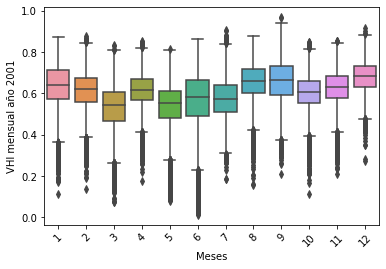

In [24]:
sns.boxplot(x='Meses', y='VALOR', data=A2001)
plt.ylabel("VHI mensual año 2001")
plt.xlabel("Meses")
plt.xticks(rotation=45)
plt.show()

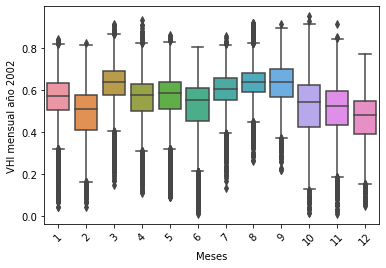

In [25]:
sns.boxplot(x='Meses', y='VALOR', data=A2002)
plt.ylabel("VHI mensual año 2002")
plt.xlabel("Meses")
plt.xticks(rotation=45)
plt.show()

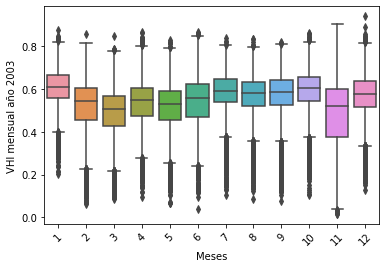

In [26]:
sns.boxplot(x='Meses', y='VALOR', data=A2003)
plt.ylabel("VHI mensual año 2003")
plt.xlabel("Meses")
plt.xticks(rotation=45)
plt.show()

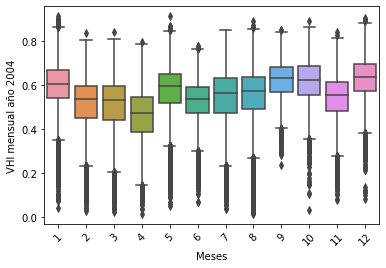

In [27]:
sns.boxplot(x='Meses', y='VALOR', data=A2004)
plt.ylabel("VHI mensual año 2004")
plt.xlabel("Meses")
plt.xticks(rotation=45)
plt.show()

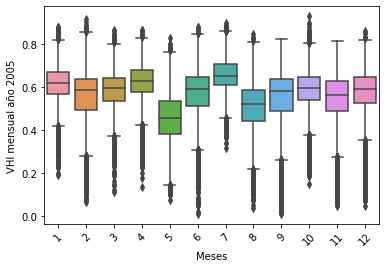

In [28]:
sns.boxplot(x='Meses', y='VALOR', data=A2005)
plt.ylabel("VHI mensual año 2005")
plt.xlabel("Meses")
plt.xticks(rotation=45)
plt.show()

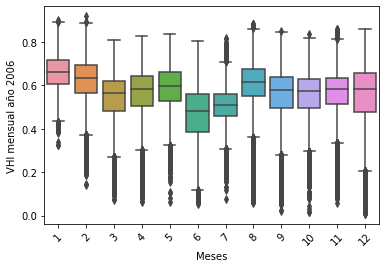

In [29]:
sns.boxplot(x='Meses', y='VALOR', data=A2006)
plt.ylabel("VHI mensual año 2006")
plt.xlabel("Meses")
plt.xticks(rotation=45)
plt.show()

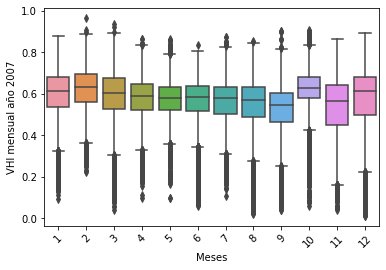

In [30]:
sns.boxplot(x='Meses', y='VALOR', data=A2007)
plt.ylabel("VHI mensual año 2007")
plt.xlabel("Meses")
plt.xticks(rotation=45)
plt.show()

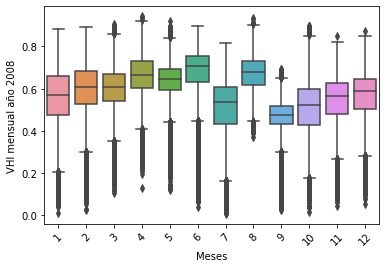

In [31]:
sns.boxplot(x='Meses', y='VALOR', data=A2008)
plt.ylabel("VHI mensual año 2008")
plt.xlabel("Meses")
plt.xticks(rotation=45)
plt.show()

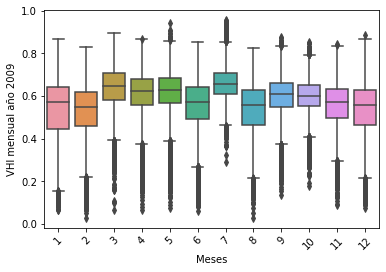

In [32]:
sns.boxplot(x='Meses', y='VALOR', data=A2009)
plt.ylabel("VHI mensual año 2009")
plt.xlabel("Meses")
plt.xticks(rotation=45)
plt.show()

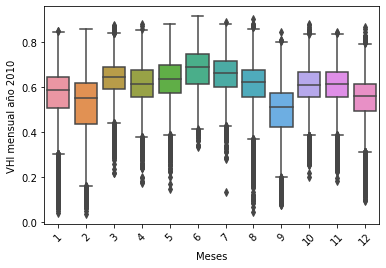

In [33]:
sns.boxplot(x='Meses', y='VALOR', data=A2010)
plt.ylabel("VHI mensual año 2010")
plt.xlabel("Meses")
plt.xticks(rotation=45)
plt.show()

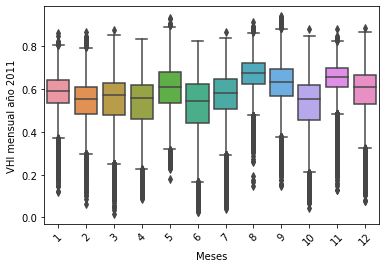

In [34]:
sns.boxplot(x='Meses', y='VALOR', data=A2011)
plt.ylabel("VHI mensual año 2011")
plt.xlabel("Meses")
plt.xticks(rotation=45)
plt.show()

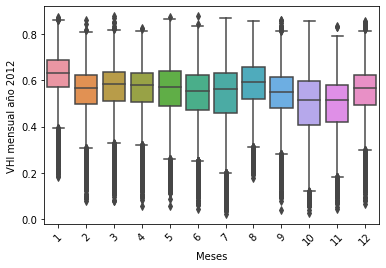

In [35]:
sns.boxplot(x='Meses', y='VALOR', data=A2012)
plt.ylabel("VHI mensual año 2012")
plt.xlabel("Meses")
plt.xticks(rotation=45)
plt.show()

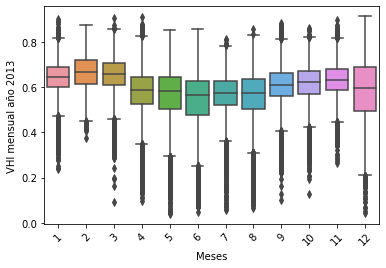

In [36]:
sns.boxplot(x='Meses', y='VALOR', data=A2013)
plt.ylabel("VHI mensual año 2013")
plt.xlabel("Meses")
plt.xticks(rotation=45)
plt.show()

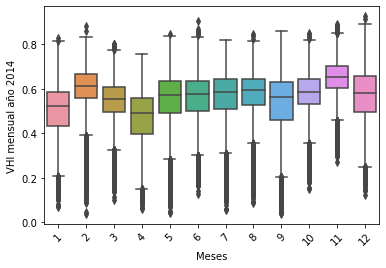

In [37]:
sns.boxplot(x='Meses', y='VALOR', data=A2014)
plt.ylabel("VHI mensual año 2014")
plt.xlabel("Meses")
plt.xticks(rotation=45)
plt.show()

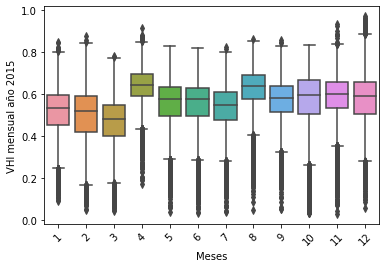

In [38]:
sns.boxplot(x='Meses', y='VALOR', data=A2015)
plt.ylabel("VHI mensual año 2015")
plt.xlabel("Meses")
plt.xticks(rotation=45)
plt.show()

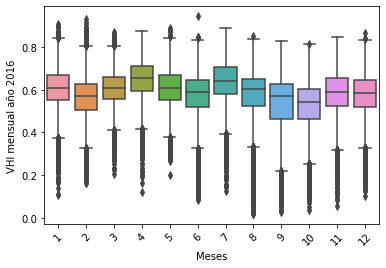

In [39]:
sns.boxplot(x='Meses', y='VALOR', data=A2016)
plt.ylabel("VHI mensual año 2016")
plt.xlabel("Meses")
plt.xticks(rotation=45)
plt.show()

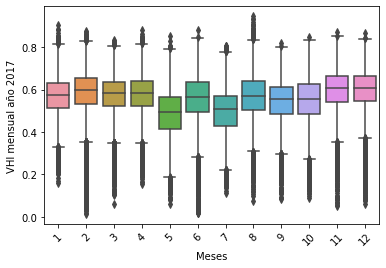

In [40]:
sns.boxplot(x='Meses', y='VALOR', data=A2017)
plt.ylabel("VHI mensual año 2017")
plt.xlabel("Meses")
plt.xticks(rotation=45)
plt.show()

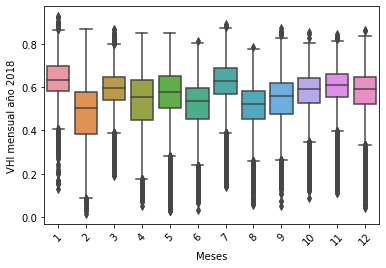

In [41]:
sns.boxplot(x='Meses', y='VALOR', data=A2018)
plt.ylabel("VHI mensual año 2018")
plt.xlabel("Meses")
plt.xticks(rotation=45)
plt.show()

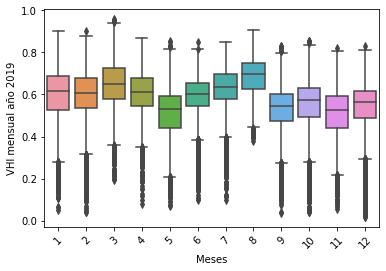

In [42]:
sns.boxplot(x='Meses', y='VALOR', data=A2019)
plt.ylabel("VHI mensual año 2019")
plt.xlabel("Meses")
plt.xticks(rotation=45)
plt.show()

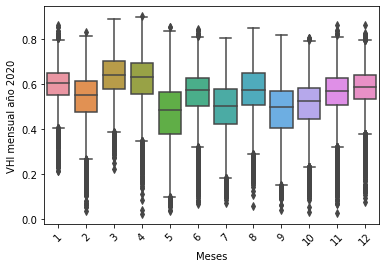

In [43]:
sns.boxplot(x='Meses', y='VALOR', data=A2020)
plt.ylabel("VHI mensual año 2020")
plt.xlabel("Meses")
plt.xticks(rotation=45)
plt.show()

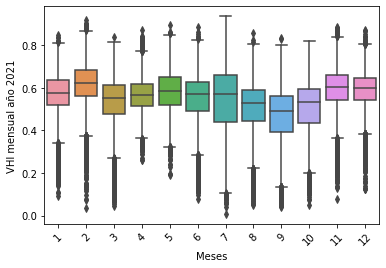

In [44]:
sns.boxplot(x='Meses', y='VALOR', data=A2021)
plt.ylabel("VHI mensual año 2021")
plt.xlabel("Meses")
plt.xticks(rotation=45)
plt.show()

# **<font color="red">5. Media movil trimestral</font>**

In [45]:
SeriesVHI = PromMeses['VALOR'].to_frame()

In [46]:
SeriesVHI['SMA3'] = SeriesVHI['VALOR'].rolling(window=5).mean()

In [47]:
SeriesVHI.dropna(inplace=True)

In [48]:
SeriesVHI

,VALOR,SMA3
Fecha,,
2001-05-31,0.537826,0.585659
2001-06-30,0.555977,0.569681
2001-07-31,0.573301,0.561993
2001-08-31,0.654242,0.586787
2001-09-30,0.659147,0.596099
...,...,...
2021-08-31,0.510306,0.551423
2021-09-30,0.470451,0.531906
2021-10-31,0.511375,0.517156


(array([408, 468, 528, 588]),
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

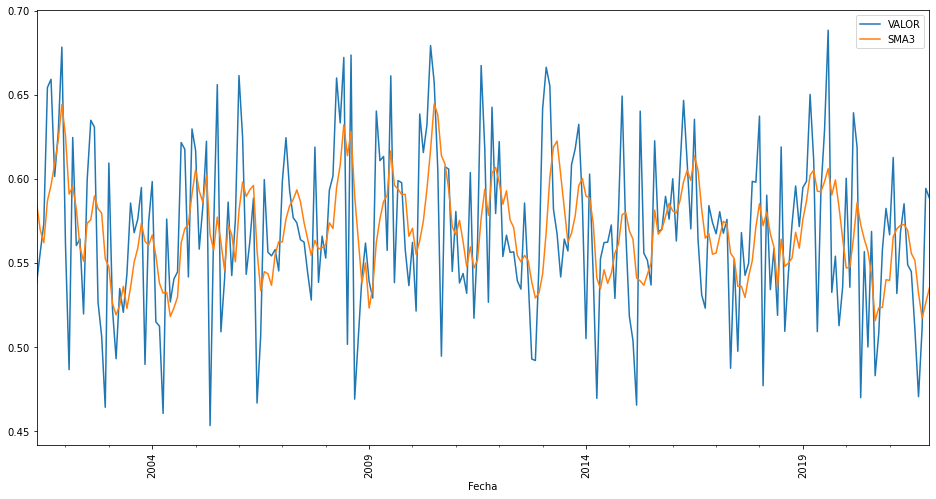

In [49]:
SeriesVHI[['VALOR', 'SMA3']].plot(label='VHI',figsize=(16, 8))
plt.xticks(rotation=90)

# **6. Creación de arreglos espacio temporales**

In [50]:
RawVHI_multiindex = RawVHI.reset_index()
del RawVHI_multiindex["Meses"]
del RawVHI_multiindex["Anios"]
RawVHI_multiindex = RawVHI_multiindex.set_index(['Fecha','y','x'])
#RawVHI_multiindex.rename(columns = {'VALOR':'VHI'}, inplace = True)
RawVHI_multiindex

VALOR
Fecha      y        x                   
2001-01-01 2.510791 -76.972145  0.431432
                    -76.963162  0.614355
                    -76.954179  0.624116
                    -76.945196  0.670600
           2.501808 -76.972145  0.503002
...                                  ...
2021-12-01 0.687211 -77.789612  0.487293
           0.678228 -77.879444  0.438945
                    -77.861477  0.503288
                    -77.852494  0.478480
                    -77.834528  0.384898

[3290737 rows x 1 columns]

In [51]:
RawVHI_As_XArray = xr.DataArray(RawVHI_multiindex)

In [52]:
RawVHI_As_XArray

<xarray.DataArray (dim_0: 3290737, dim_1: 1)>
array([[0.43143186],
       [0.61435527],
       [0.62411554],
       ...,
       [0.5032883 ],
       [0.47848013],
       [0.38489761]])
Coordinates:
  * dim_0    (dim_0) MultiIndex
  - Fecha    (dim_0) datetime64[ns] 2001-01-01 2001-01-01 ... 2021-12-01
  - y        (dim_0) float64 2.511 2.511 2.511 2.511 ... 0.6782 0.6782 0.6782
  - x        (dim_0) float64 -76.97 -76.96 -76.95 ... -77.86 -77.85 -77.83
  * dim_1    (dim_1) object 'VALOR'

In [53]:
RawVHI_multiindex = RawVHI_multiindex.to_xarray()

In [54]:
RawVHI_multiindex

<xarray.Dataset>
Dimensions:  (Fecha: 252, y: 205, x: 157)
Coordinates:
  * Fecha    (Fecha) datetime64[ns] 2001-01-01 2001-02-01 ... 2021-12-01
  * y        (y) float64 0.6782 0.6872 0.6962 0.7052 ... 2.484 2.493 2.502 2.511
  * x        (x) float64 -77.96 -77.95 -77.94 -77.93 ... -76.58 -76.57 -76.56
Data variables:
    VALOR    (Fecha, y, x) float64 nan nan nan nan nan ... nan nan nan nan nan

In [55]:
# cambiar nombres de variables
RawVHI_multiindex = RawVHI_multiindex.rename({'Fecha':'time', 'y':'latitude','x':'longitude'})

In [56]:
# Atributo de variables
#RawVHI_multiindex['VHI'].attrs = {'units':'', 'long_name':'vegetation health index'}

In [57]:
RawVHI_multiindex.info()

xarray.Dataset {
dimensions:
	time = 252 ;
	latitude = 205 ;
	longitude = 157 ;

variables:
	datetime64[ns] time(time) ;
	float64 latitude(latitude) ;
	float64 longitude(longitude) ;
	float64 VALOR(time, latitude, longitude) ;

// global attributes:
}

# **<font color="red">6.1. Mapas espacio temporal por día</font>**

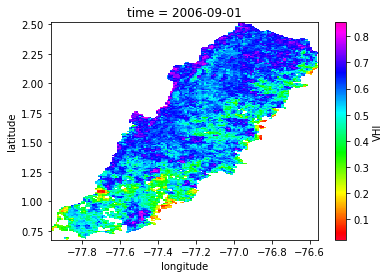

In [123]:
RawVHI_multiindex.VALOR[68,:,:].plot(cmap="gist_rainbow",cbar_kwargs={"label": "VHI"})
plt.show()
# 142, 199 --> PCA max
# 224, 92 --> PCA min
#169-189

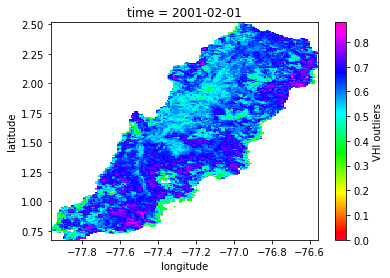

In [59]:
RawVHI_outliers = RawVHI_multiindex.VALOR[1,:,:]
RawVHI_outliers[0, 0] = 0
RawVHI_outliers[-1, -1] = 0.1
RawVHI_outliers.plot(cmap="gist_rainbow",cbar_kwargs={"label": "VHI outliers"})

# **<font color="red">6.2. Mapas espacio temporal - Promedio mutianual</font>**

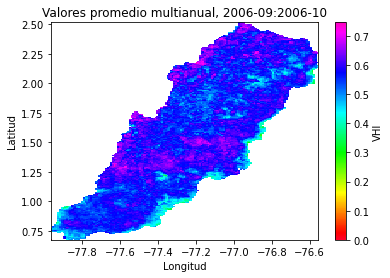

In [60]:
RawVHI_multiindex.VALOR.mean(dim='time').plot(cmap="gist_rainbow",cbar_kwargs={"label": "VHI"})
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title("Valores promedio multianual, 2006-09:2006-10")
plt.show()

# **<font color="red">6.3. Mapas espacio temporal - Mínimo multianual</font>**

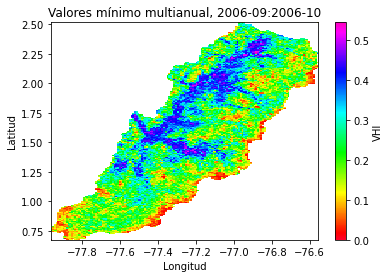

In [61]:
RawVHI_multiindex.VALOR.min(dim='time').plot(cmap="gist_rainbow",cbar_kwargs={"label": "VHI"})
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title("Valores mínimo multianual, 2006-09:2006-10")
plt.show()

# **<font color="red">6.4. Mapas espacio temporal - Máximo multianual</font>**

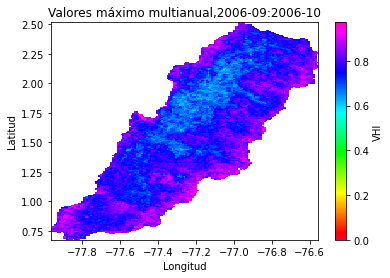

In [62]:
RawVHI_multiindex.VALOR.max(dim='time').plot(cmap="gist_rainbow",cbar_kwargs={"label": "VHI"})
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title("Valores máximo multianual,2006-09:2006-10")
plt.show()

# **<font color="red">6.4. Mapas espacio temporal - DesVest multianual</font>**

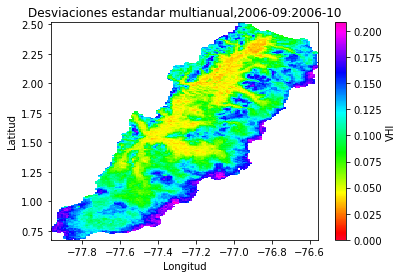

In [63]:
RawVHI_multiindex.VALOR.std(dim='time').plot(cmap="gist_rainbow",cbar_kwargs={"label": "VHI"})
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title("Desviaciones estandar multianual,2006-09:2006-10")
plt.show()

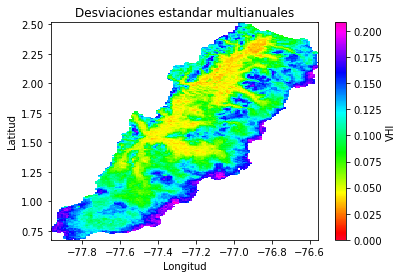

In [64]:
RawVHI_multiindex.VALOR.std(dim='time').plot(cmap="gist_rainbow",cbar_kwargs={"label": "VHI"})
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title("Desviaciones estandar multianuales")
plt.show()

# **<font color="red">7. PCA</font>**

In [65]:
Filled = RawVHI_multiindex.interpolate_na(dim=["x","y", "time"], method="barycentric",fill_value="extrapolate")
#Filled = RawVHI_multiindex.fillna(-2)

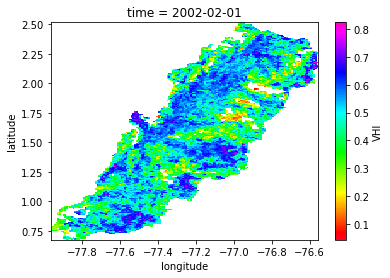

In [66]:
Filled.VALOR[13,:,:].plot(cmap="gist_rainbow",cbar_kwargs={"label": "VHI"})
plt.show()

In [67]:
DataArray = RawVHI_multiindex.VALOR[:252,:,:].fillna(-9999)
#DataArray = RawVHI_multiindex.VALOR[:252,:,:]
#DataArray = RawVHI_multiindex.interpolate_na(dim=None, method="barycentric",fill_value="extrapolate")

In [68]:
DataArray


<xarray.DataArray 'VALOR' (time: 252, latitude: 205, longitude: 157)>
array([[[-9.999e+03, -9.999e+03, -9.999e+03, ..., -9.999e+03,
         -9.999e+03, -9.999e+03],
        [-9.999e+03, -9.999e+03, -9.999e+03, ..., -9.999e+03,
         -9.999e+03, -9.999e+03],
        [-9.999e+03, -9.999e+03, -9.999e+03, ..., -9.999e+03,
         -9.999e+03, -9.999e+03],
        ...,
        [-9.999e+03, -9.999e+03, -9.999e+03, ..., -9.999e+03,
         -9.999e+03, -9.999e+03],
        [-9.999e+03, -9.999e+03, -9.999e+03, ..., -9.999e+03,
         -9.999e+03, -9.999e+03],
        [-9.999e+03, -9.999e+03, -9.999e+03, ..., -9.999e+03,
         -9.999e+03, -9.999e+03]],

       [[ 0.000e+00, -9.999e+03, -9.999e+03, ..., -9.999e+03,
         -9.999e+03, -9.999e+03],
        [-9.999e+03, -9.999e+03, -9.999e+03, ..., -9.999e+03,
         -9.999e+03, -9.999e+03],
        [-9.999e+03, -9.999e+03, -9.999e+03, ..., -9.999e+03,
         -9.999e+03, -9.999e+03],
...
        [-9.999e+03, -9.999e+03, -9.999e+03, ..., -9.999e+03,
         -9.999e+03, -9.999e+03],
        [-9.999e+03, -9.999e+03, -9.999e+03, ..., -9.999e+03,
         -9.999e+03, -9.999e+03],
        [-9.999e+03, -9.999e+03, -9.999e+03, ..., -9.999e+03,
         -9.999e+03, -9.999e+03]],

       [[-9.999e+03, -9.999e+03, -9.999e+03, ..., -9.999e+03,
         -9.999e+03, -9.999e+03],
        [-9.999e+03, -9.999e+03, -9.999e+03, ..., -9.999e+03,
         -9.999e+03, -9.999e+03],
        [-9.999e+03, -9.999e+03, -9.999e+03, ..., -9.999e+03,
         -9.999e+03, -9.999e+03],
        ...,
        [-9.999e+03, -9.999e+03, -9.999e+03, ..., -9.999e+03,
         -9.999e+03, -9.999e+03],
        [-9.999e+03, -9.999e+03, -9.999e+03, ..., -9.999e+03,
         -9.999e+03, -9.999e+03],
        [-9.999e+03, -9.999e+03, -9.999e+03, ..., -9.999e+03,
         -9.999e+03, -9.999e+03]]])
Coordinates:
  * time       (time) datetime64[ns] 2001-01-01 2001-02-01 ... 2021-12-01
  * latitude   (latitude) float64 0.6782 0.6872 0.6962 ... 2.493 2.502 2.511
  * longitude  (longitude) float64 -77.96 -77.95 -77.94 ... -76.58 -76.57 -76.56

In [69]:
Arreglo = DataArray.to_numpy()

Arreglo = Arreglo.reshape(Arreglo.shape[0], -1)

Arreglo.astype(int)

#Arreglo = Arreglo[~np.isnan(Arreglo).any(axis=1)]

#Arreglo= np.nanmean(Arreglo, axis=1)

Arreglo

array([[-9.999e+03, -9.999e+03, -9.999e+03, ..., -9.999e+03, -9.999e+03,
        -9.999e+03],
       [ 0.000e+00, -9.999e+03, -9.999e+03, ..., -9.999e+03, -9.999e+03,
         1.000e-01],
       [-9.999e+03, -9.999e+03, -9.999e+03, ..., -9.999e+03, -9.999e+03,
        -9.999e+03],
       ...,
       [-9.999e+03, -9.999e+03, -9.999e+03, ..., -9.999e+03, -9.999e+03,
        -9.999e+03],
       [-9.999e+03, -9.999e+03, -9.999e+03, ..., -9.999e+03, -9.999e+03,
        -9.999e+03],
       [-9.999e+03, -9.999e+03, -9.999e+03, ..., -9.999e+03, -9.999e+03,
        -9.999e+03]])

In [70]:
Arreglo.shape

(252, 32185)

In [71]:
y = Target(coord='time')(DataArray)

In [72]:
y

sklearn_xarray.Target with data:
<xarray.DataArray 'time' (time: 252)>
array(['2001-01-01T00:00:00.000000000', '2001-02-01T00:00:00.000000000',
       '2001-03-01T00:00:00.000000000', ..., '2021-10-01T00:00:00.000000000',
       '2021-11-01T00:00:00.000000000', '2021-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2001-01-01 2001-02-01 ... 2021-12-01

In [73]:
#DataArray = DataArray.drop_vars('x')

In [74]:
#DataArray = DataArray.drop_vars('y')

In [75]:
RawVHI_multiindex_PCA = wrap(PCA(n_components=2), reshapes=y).fit_transform(Arreglo)

In [76]:
RawVHI_multiindex_PCA[:,0]

array([-64890.15897   , -37510.2167124 ,  78584.42699448, -68337.64604602,
       -15432.9413517 ,   6995.8211373 ,  74479.79374209, -68343.39291407,
       -65923.82835353, -67257.57954524, -66611.07841629, -68346.05252934,
        63355.00023783,  44541.37391547, -64039.90257685,  12068.34442034,
       -55960.1233904 , 188833.783802  , -68337.73954524, -24125.28524198,
       -68095.32075711, 171811.57958681, 283783.1595506 , 257827.96679135,
       -67602.91701497, -41747.69927069, -17659.31991285, -49560.78845407,
       256008.1771774 , -28894.86727059, -67724.09115148, -37003.19881436,
       -44933.4108441 ,  86548.72132427, 134773.86936907, -57750.10978019,
       -56829.33865223, -28207.28424146, -41723.44929854,  64359.45959772,
        43167.20160147,  91361.69719095, 105357.04692943,  30649.80055562,
       -66039.9554862 , -64317.35846337,  52991.07592523, -62006.32088743,
       -61982.67153203,   1197.39321029, -60743.94729204, -60806.2218024 ,
       156884.56317235, -

In [77]:
PCA1 = pd.DataFrame(RawVHI_multiindex_PCA[:,0],columns=["PCA1"], index=PromMeses.index)
PCA1

,PCA1
Fecha,
2001-01-31,-64890.158970
2001-02-28,-37510.216712
2001-03-31,78584.426994
2001-04-30,-68337.646046
2001-05-31,-15432.941352
...,...
2021-08-31,-40266.573125
2021-09-30,112749.180686
2021-10-31,10838.490631


In [78]:
PCA2 = pd.DataFrame(RawVHI_multiindex_PCA[:,1],columns=["PCA2"], index=PromMeses.index)
PCA2

,PCA2
Fecha,
2001-01-31,15558.894983
2001-02-28,-11769.917310
2001-03-31,2786.805715
2001-04-30,9457.029508
2001-05-31,-36453.234069
...,...
2021-08-31,39069.295649
2021-09-30,94255.933184
2021-10-31,88778.628272


In [79]:
PCA1.to_csv(r'D:\DOCS\PATIA\PCA1L.csv', index=True)

In [80]:
PCA2.to_csv(r'D:\DOCS\PATIA\PCA2L.csv', index=True)

(array([408, 468, 528, 588]),
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

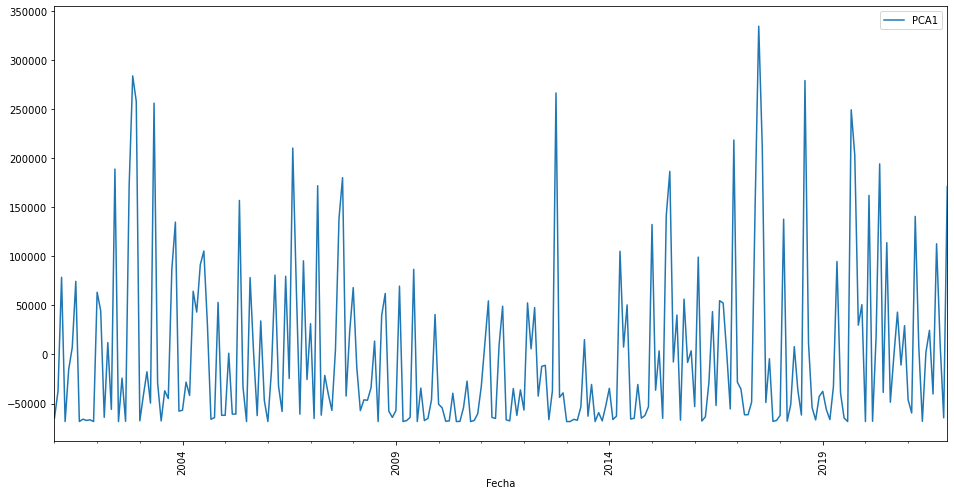

In [81]:
PCA1[['PCA1']].plot(label='PCA1',figsize=(16, 8))
plt.xticks(rotation=90)

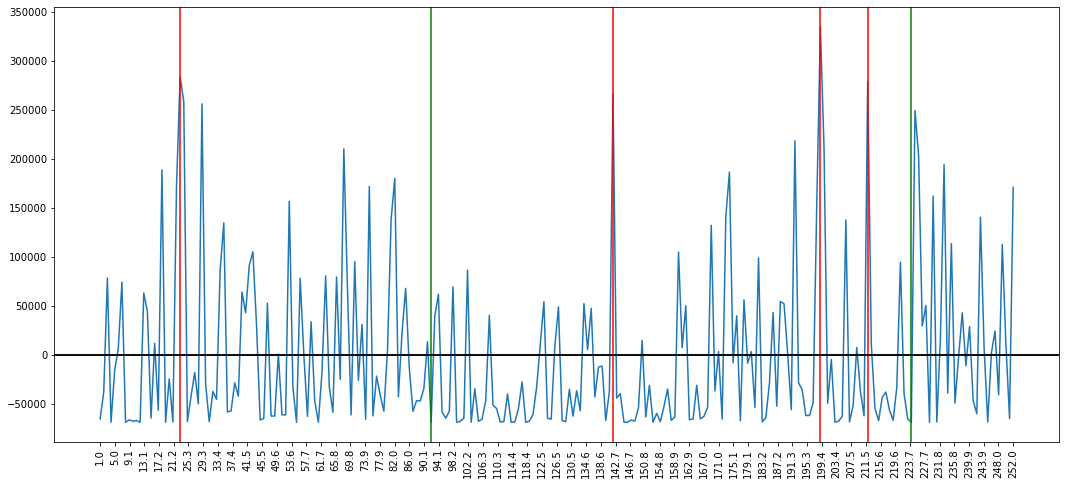

In [82]:
plt.figure(figsize = (18, 8))
plt.plot(np.linspace(1,252,252),RawVHI_multiindex_PCA[:,0],label='PCA1')
plt.xticks(np.linspace(1,252,63),rotation=90)
plt.axvline(x = 23, color = 'r')#max
plt.axvline(x = 142, color = 'r')#max
plt.axvline(x = 199, color = 'r')#max
plt.axvline(x = 212, color = 'r')#max
plt.axvline(x = 224, color = 'g')#min
plt.axvline(x = 92, color = 'g')#min
plt.axhline(y = -20, color = 'black')
plt.axhline(y = 20, color = 'black')
plt.show()
# 142, 199 --> PCA max
# 224, 92 --> PCA min

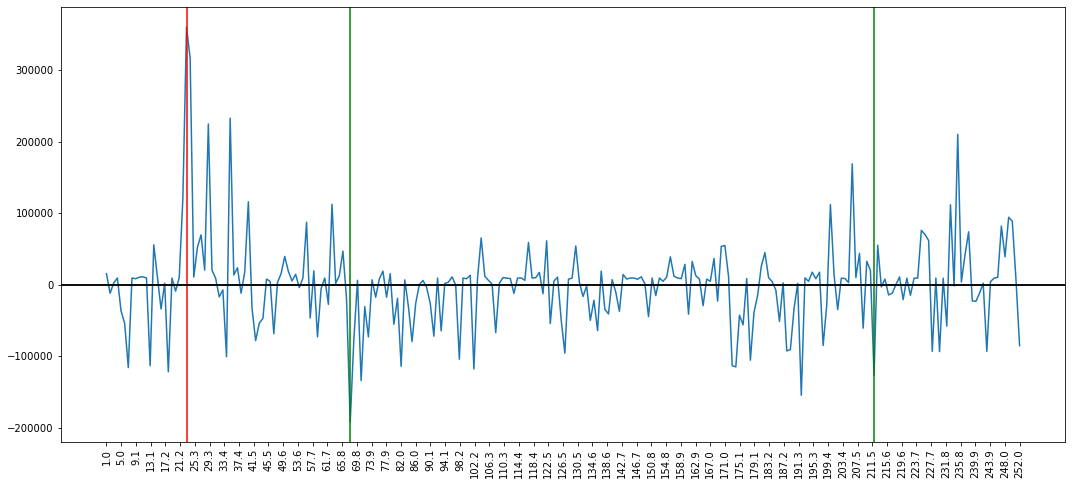

In [83]:
plt.figure(figsize = (18, 8))
plt.plot(np.linspace(1,252,252),RawVHI_multiindex_PCA[:,1],label='PCA2')
plt.xticks(np.linspace(1,252,63),rotation=90)
plt.axvline(x = 23, color = 'r')#Max
plt.axvline(x = 68, color = 'g')#Min
plt.axvline(x = 212, color = 'g')#min
plt.axhline(y = -20, color = 'black')
plt.axhline(y = 40, color = 'black')
plt.show()
# 142, 199 --> PCA max
# 224, 92 --> PCA min

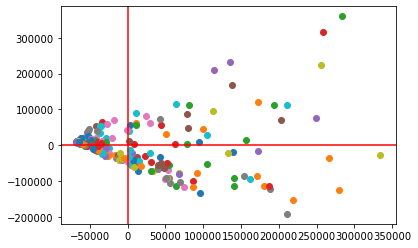

In [84]:
for i in range(252):
    plt.scatter(RawVHI_multiindex_PCA[i,0],RawVHI_multiindex_PCA[i,1])

plt.axvline(x = 0, color = 'r')
plt.axhline(y = 0, color = 'r')

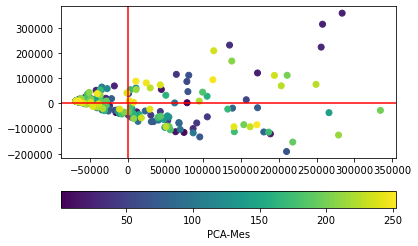

In [85]:
plt.scatter(x=RawVHI_multiindex_PCA[:,0], y=RawVHI_multiindex_PCA[:,1], c=np.linspace(1,252,252), cmap="viridis")
  
plt.colorbar(label="PCA-Mes", orientation="horizontal")
plt.axvline(x = 0, color = 'r')
plt.axhline(y = 0, color = 'r')
plt.show()

# **<font color="red">8. NLPCA</font>**

In [86]:
#imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [87]:
#Arreglo = imp.fit(Arreglo)

In [88]:
#Arreglo = imp.transform(Arreglo)

In [89]:
XTrain, XTest, YTrain, YTest = train_test_split(Arreglo, y, test_size = 0.2, random_state = 0)

In [90]:
# kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘cosine’, ‘precomputed’}, default=’linear’

kernel_pca = KernelPCA(n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1)

In [91]:
XTrain = kernel_pca.fit_transform(XTrain)

In [92]:
XTest = kernel_pca.transform(XTest)

In [93]:
XAll = kernel_pca.transform(Arreglo) 

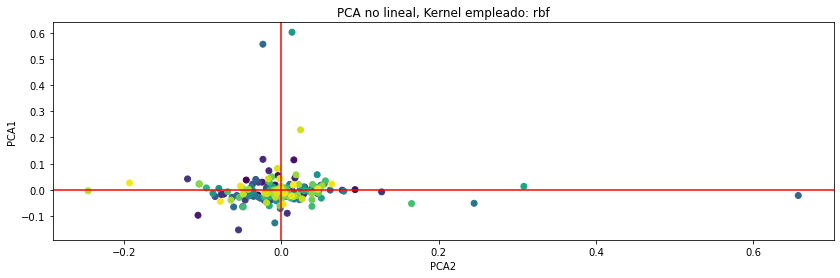

In [94]:
fig, (kernel_pca_proj_ax) = plt.subplots( ncols=1, figsize=(14, 4))

kernel_pca_proj_ax.scatter(XAll[:, 0], XAll[:, 1], c=np.linspace(1,252,252), cmap="viridis")
kernel_pca_proj_ax.set_ylabel("PCA1")
kernel_pca_proj_ax.set_xlabel("PCA2")
_ = kernel_pca_proj_ax.set_title("PCA no lineal, Kernel empleado: rbf")
plt.axvline(x = 0, color = 'r')
plt.axhline(y = 0, color = 'r')


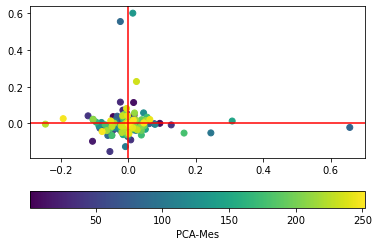

In [95]:
plt.scatter(x=XAll[:,0], y=XAll[:,1], c=np.linspace(1,252,252), cmap="viridis")
  
plt.axvline(x = 0, color = 'r')
plt.axhline(y = 0, color = 'r')
plt.colorbar(label="PCA-Mes", orientation="horizontal")
plt.show()

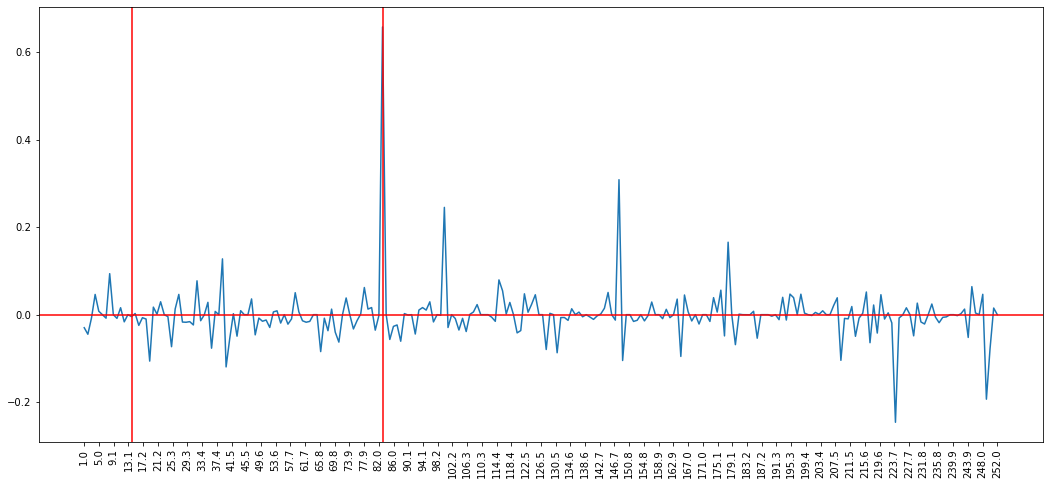

In [96]:
plt.figure(figsize = (18, 8))
plt.plot(np.linspace(1,252,252),XAll[:,0],label='PCA1')
plt.xticks(np.linspace(1,252,63),rotation=90)
plt.axvline(x = 14, color = 'r')#Max
plt.axvline(x = 83, color = 'r')#Max
plt.axhline(y = 0, color = 'r')#Max
plt.show()

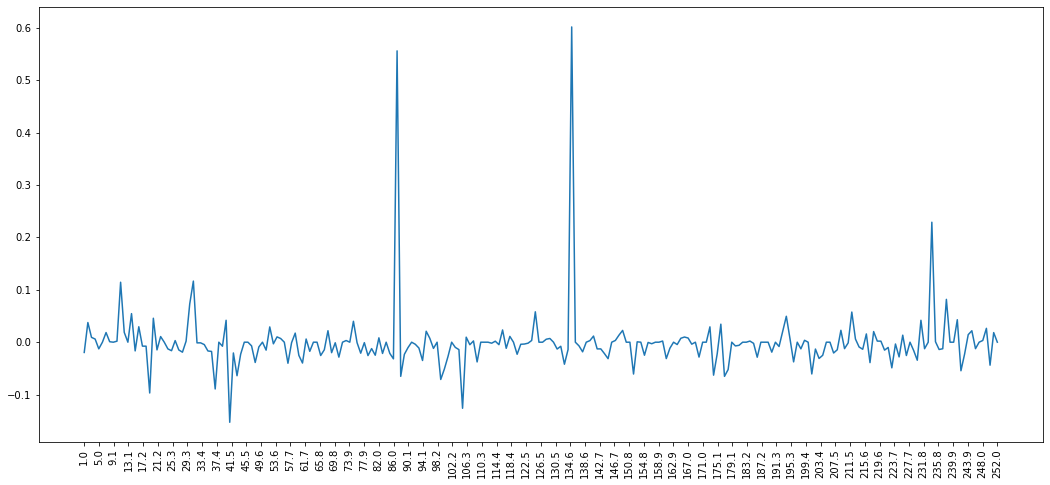

In [97]:
plt.figure(figsize = (18, 8))
plt.plot(np.linspace(1,252,252),XAll[:,1],label='PCA2')
plt.xticks(np.linspace(1,252,63),rotation=90)
plt.show()

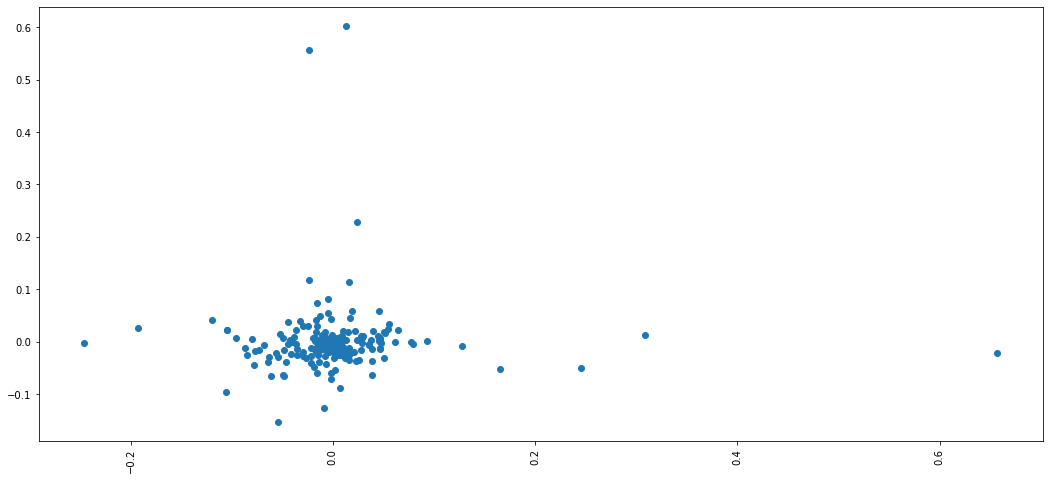

In [98]:
plt.figure(figsize = (18, 8))
plt.scatter(XAll[:,0],XAll[:,1],label='PCA1 Vs PCA2')
plt.xticks(rotation=90)
plt.show()

In [99]:
from numpy.linalg import eigh

In [100]:
cov_matrix = np.cov(XTrain, rowvar=False)

In [101]:
egnvalues, egnvectors = eigh(cov_matrix)

In [102]:
total_egnvalues = sum(egnvalues)
var_exp = [(i/total_egnvalues) for i in sorted(egnvalues, reverse=True)]

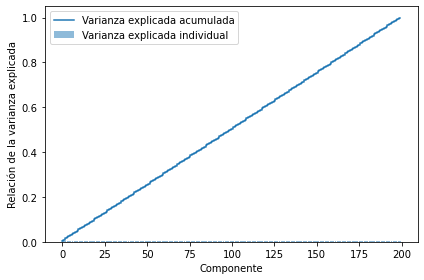

In [103]:
cum_sum_exp = np.cumsum(var_exp)
plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Varianza explicada individual')
plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Varianza explicada acumulada')
plt.ylabel('Relación de la varianza explicada')
plt.xlabel('Componente')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [104]:
var_exp[0:3]

[0.005000000000000023, 0.00500000000000002, 0.005000000000000019]

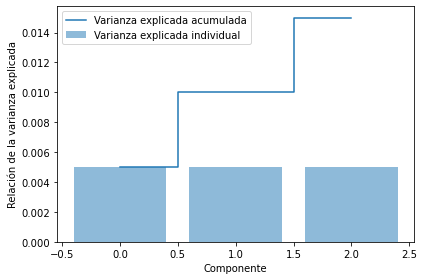

In [105]:
cum_sum_exp = np.cumsum(var_exp[0:3])
plt.bar(range(0,len(var_exp[0:3])), var_exp[0:3], alpha=0.5, align='center', label='Varianza explicada individual')
plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Varianza explicada acumulada')
plt.ylabel('Relación de la varianza explicada')
plt.xlabel('Componente')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [106]:
#PCA2NL = pd.DataFrame(XAll[:,1],columns=["PCA2NL"], index=PromMeses.index)
#PCA2NL.to_csv(r'D:\DOCS\PATIA\PCA2NL.csv', index=False)

In [107]:
#PCA1NL = pd.DataFrame(XAll[:,0],columns=["PCA1NL"], index=PromMeses.index)
#PCA1NL.to_csv(r'D:\DOCS\PATIA\PCA1NL.csv', index=False)

In [108]:
#ArregloT = np.transpose(Arreglo)

In [109]:
#ArregloT

In [110]:
#y = np.linspace(1,32185,32185)

In [111]:
#XTrain, XTest, YTrain, YTest = train_test_split(ArregloT, y, test_size = 0.2, random_state = 0)

In [112]:
#kernel_pca = KernelPCA(n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1)

In [113]:
#XTrain = kernel_pca.fit_transform(XTrain)

In [114]:
#XAll = kernel_pca.transform(ArregloT) 

<a href="https://xarray.dev/">xarray</a><br>
<a href="https://xarray-test.readthedocs.io/en/latest/time-series.html">xarray docs</a><br>
<a href="https://docs.xarray.dev/en/stable/user-guide/plotting.html">xarray plot</a><br>
<a href="https://towardsdatascience.com/how-to-create-xarray-datasets-cf1859c95921">xarray towards 1</a><br>
<a href="https://towardsdatascience.com/basic-data-structures-of-xarray-80bab8094efa">xarray towards 2</a><br>
<a href="https://scitools.org.uk/cartopy/docs/latest/getting_started/crs.html">Cartopy</a><br>